# Data Mining Project

In [1]:
import numpy as np
import pandas as pd
import datetime as dt 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', \
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})

print(df.head())

   step      type    amount     nameOrig  oldBalanceOrig  newBalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815        170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295         21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145           181.0            0.00   
3     1  CASH_OUT    181.00   C840083671           181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720         41554.0        29885.86   

      nameDest  oldBalanceDest  newBalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


## Classification using only numerical features before PCA

In [3]:
# First, delete some trivial features
del df['type']
del df['nameOrig']
del df['nameDest']
del df['isFlaggedFraud']

# Assign labels and features for training
X = df[['step','amount','oldBalanceOrig','newBalanceOrig','oldBalanceDest','newBalanceDest']]
y = df['isFraud']

# Split dataset to generate training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [59]:
# Gaussian Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB

def GNB_CV(X, y, cv_num): 
    start = dt.datetime.now() 
    clf = GaussianNB()
    score = cross_val_score(clf, X, y, cv=cv_num)
    print ("Cross-validation accuracy:", np.mean(score))
    print ("Cross-validation running time", dt.datetime.now()-start)
    
def GNB_Train(X_train, y_train, X_test, y_test):
    start = dt.datetime.now() 
    clf = GaussianNB()
    y_pred = clf.fit(X_train, y_train).predict(X_train)
    print ("Training accuracy:", accuracy_score(y_train, y_pred))
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print ("Testing accuracy:", accuracy_score(y_test, y_pred))
    print ("Total running time", dt.datetime.now()-start)
    
# GNB_CV(X_train, y_train, 20)
# GNB_Train(X_train, y_train, X_test, y_test)

Cross-validation accuracy: 0.991891929939
Cross-validation running time 0:00:17.978323


In [30]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

def RFC_CV(X, y, cv_num): 
    start = dt.datetime.now() 
    clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
    score = cross_val_score(clf, X, y, cv=cv_num)
    print ("Cross-validation accuracy:", np.mean(score))
    print ("Cross-validation running time", dt.datetime.now()-start)
    
def RFC_Train(X_train, y_train, X_test, y_test):
    start = dt.datetime.now() 
    clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
    y_pred = clf.fit(X_train, y_train).predict(X_train)
    print ("Training accuracy:", accuracy_score(y_train, y_pred))
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print ("Testing accuracy:", accuracy_score(y_test, y_pred))
    print ("Total running time", dt.datetime.now()-start)
    
# RFC_CV(X_train, y_train, 20)
# RFC_Train(X_train, y_train, X_test, y_test)

In [31]:
# LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def LDA_CV(X, y, cv_num): 
    start = dt.datetime.now() 
    clf = LDA()
    score = cross_val_score(clf, X, y, cv=cv_num)
    print ("Cross-validation accuracy:", np.mean(score))
    print ("Cross-validation running time", dt.datetime.now()-start)
    
def LDA_Train(X_train, y_train, X_test, y_test):
    start = dt.datetime.now() 
    clf = LDA()
    y_pred = clf.fit(X_train, y_train).predict(X_train)
    print ("Training accuracy:", accuracy_score(y_train, y_pred))
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print ("Testing accuracy:", accuracy_score(y_test, y_pred))
    print ("Total running time", dt.datetime.now()-start)
    
# LDA_CV(X_train, y_train, 20)
# LDA_Train(X_train, y_train, X_test, y_test)

In [32]:
# QDA 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

def QDA_CV(X, y, cv_num): 
    start = dt.datetime.now() 
    clf = QDA()
    score = cross_val_score(clf, X, y, cv=cv_num)
    print ("Cross-validation accuracy:", np.mean(score))
    print ("Cross-validation running time", dt.datetime.now()-start)
    
def QDA_Train(X_train, y_train, X_test, y_test):
    start = dt.datetime.now() 
    clf = QDA()
    y_pred = clf.fit(X_train, y_train).predict(X_train)
    print ("Training accuracy:", accuracy_score(y_train, y_pred))
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print ("Testing accuracy:", accuracy_score(y_test, y_pred))
    print ("Total running time", dt.datetime.now()-start)
    
# QDA_CV(X_train, y_train, 20)
# QDA_Train(X_train, y_train, X_test, y_test)

In [33]:
# Logistic Regression 
from sklearn import linear_model

def LR_CV(X, y, cv_num): 
    start = dt.datetime.now() 
    clf = linear_model.LogisticRegression()
    score = cross_val_score(clf, X, y, cv=cv_num)
    print ("Cross-validation accuracy:", np.mean(score))
    print ("Cross-validation running time", dt.datetime.now()-start)
    
def LR_Train(X_train, y_train, X_test, y_test):
    start = dt.datetime.now() 
    clf = linear_model.LogisticRegression()
    y_pred = clf.fit(X_train, y_train).predict(X_train)
    print ("Training accuracy:", accuracy_score(y_train, y_pred))
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print ("Testing accuracy:", accuracy_score(y_test, y_pred))
    print ("Total running time", dt.datetime.now()-start)
    
# LR_CV(X_train, y_train, 20)
# LR_Train(X_train, y_train, X_test, y_test)

## PCA

[  2.57410330e+19   9.72132124e+18   5.47908980e+17   4.70412794e+16
   1.24984577e+16   6.23348936e-11]
(6362620, 6)
[[  1.29329894e-05   1.68109490e-05  -5.77707934e-06  -7.05431964e-06
    3.42057576e-05   9.93653791e-01]
 [  1.59467986e-06   2.01499887e-06  -8.85847052e-07  -1.58775356e-06
    6.12104281e-06   5.81592185e-02]
 [  8.24467490e-09  -4.88421623e-09  -5.00696790e-08  -1.96296326e-07
    5.32533000e-07  -7.35454883e-02]
 ..., 
 [ -3.84956958e-05   2.20792127e-05  -3.80234268e-03  -1.49393855e-03
    1.76216074e-02   1.15008349e-05]
 [  3.86751584e-05  -2.26039220e-05  -2.36069108e-04  -9.26436856e-04
    2.50143477e-03  -7.40969740e-06]
 [ -6.25802069e-04   3.70247656e-04  -2.32744501e-04  -1.02555010e-04
    2.43264714e-03   3.35520728e-05]]


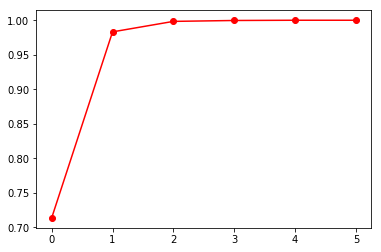

In [9]:
X_ = np.array(X).astype(float)
# Subtract sample mean
X_ -= np.mean(X_, axis=1)[:, np.newaxis]
# Get eigenValues and eigenVectors by using Singular Value Decomposition
U, W, _ = np.linalg.svd(X_, full_matrices=False)
W = W ** 2 / (X.shape[1] - 1)
# Calculate cumulative sum of eigenValues
S = np.cumsum(W)
R = S / S[-1]
# Plot cumulative sum
plt.plot(R, 'ro-')
# Taking the first Kth eigenVectors to reduce dimensions, where their corresponding eigenValues' cumulative sum
# should be smaller than 0.9.
n = (R < 0.9).sum()
# Data projection to lower dimensions.
A = U[:, :n].T.dot(X_)
print (W)
print (U.shape)
print (U)

In [7]:
# Dimension reduction
from sklearn.decomposition import PCA 
# from sklearn import preprocessing
# data_scaled = pd.DataFrame()

pca = PCA(n_components=6, whiten=False)
X_new = pca.fit_transform(X)

print (pd.DataFrame(pca.components_, columns=['step','amount','oldBalanceOrig','newBalanceOrig','oldBalanceDest','newBalanceDest'], index=['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6']))
# print (pca.explained_variance_ratio_)

# X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

              step    amount  oldBalanceOrig  newBalanceOrig  oldBalanceDest  \
PC-1  7.257960e-07  0.046518        0.094488        0.096003        0.672195   
PC-2 -5.058581e-07 -0.010545        0.696261        0.704848       -0.079591   
PC-3  3.469720e-07  0.721502        0.024412       -0.004594       -0.531547   
PC-4 -2.373445e-05 -0.690555        0.038849       -0.026515       -0.508011   
PC-5  1.311286e-05  0.017127        0.710061       -0.702316        0.034665   
PC-6  1.000000e+00 -0.000017       -0.000008        0.000009       -0.000013   

      newBalanceDest  
PC-1        0.726530  
PC-2       -0.109376  
PC-3        0.443030  
PC-4        0.512685  
PC-5       -0.032711  
PC-6        0.000012  


In [65]:
# Show dimension differences
print (X.shape, y.shape)
print (X_new.shape, y.shape)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6362620, 6) (6362620,)
(6362620, 1) (6362620,)
(4453834, 1) (1908786, 1) (4453834,) (1908786,)


In [66]:
# Gaussian Naive Bayes classifier 
# GNB_CV(X_train, y_train, 20)
# GNB_Train(X_train, y_train, X_test, y_test)

In [67]:
# Random Forest 
# RFC_CV(X_train, y_train, 20)
# RFC_Train(X_train, y_train, X_test, y_test)

In [71]:
# LDA 
# LDA_CV(X_train, y_train, 20)
# LDA_Train(X_train, y_train, X_test, y_test)

Training accuracy: 0.99869909835
Testing accuracy: 0.998732702356
Total running time 0:00:02.426151


In [75]:
# QDA 
# QDA_CV(X_train, y_train, 20)
# QDA_Train(X_train, y_train, X_test, y_test)

Training accuracy: 0.997288403654
Testing accuracy: 0.997279946521
Total running time 0:00:01.887205


In [79]:
# Logistic Regression 
# LR_CV(X_train, y_train, 10)
LR_Train(X_train, y_train, X_test, y_test)

Training accuracy: 0.99869909835
Testing accuracy: 0.998732702356
Total running time 0:00:42.173594
